**Build and train Random Forest, XGBoost, and KNN models on US Army Anthropometric Working DB.**

These algorithms can be used to training and evaluating multiple models, such as Random Forest, XGBoost, and KNN, on the Soldier Race dataset and compare their performance and determine which algorithm performs best for this specific task.

In [34]:
import numpy as np
import pandas as pd
from sklearn import metrics
import imblearn
import logging
import warnings
import statistics
import seaborn as sns
from collections import Counter
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score , accuracy_score, precision_score, recall_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D
from imblearn.combine import SMOTEENN
from sklearn import preprocessing
from sklearn.metrics import classification_report

#feature selection
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

from imblearn.under_sampling import NearMiss

In [2]:
DfMale =   pd.read_csv("/Users/nada/Downloads/ANSUR II MALE Public.csv", encoding="latin-1")
DfFemale = pd.read_csv("/Users/nada/Downloads/ANSUR II FEMALE Public.csv")


In [3]:
DfMale.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10027,266,1467,337,222,1347,253,202,401,369,...,Combat Arms,19D,North Dakota,1,NaN,1,41,71,180,Right hand
1,10032,233,1395,326,220,1293,245,193,394,338,...,Combat Support,68W,New York,1,NaN,1,35,68,160,Left hand
2,10033,287,1430,341,230,1327,256,196,427,408,...,Combat Support,68W,New York,2,NaN,2,42,68,205,Left hand
3,10092,234,1347,310,230,1239,262,199,401,359,...,Combat Service Support,88M,Wisconsin,1,NaN,1,31,66,175,Right hand
4,10093,250,1585,372,247,1478,267,224,435,356,...,Combat Service Support,92G,North Carolina,2,NaN,2,21,77,213,Right hand


In [4]:
DfFemale.head()

,SubjectId,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Ethnicity,DODRace,Age,Heightin,Weightlbs,WritingPreference
0,10037,231,1282,301,204,1180,222,177,373,315,...,Combat Support,92Y,Germany,2,NaN,2,26,61,142,Right hand
1,10038,194,1379,320,207,1292,225,178,372,272,...,Combat Service Support,25U,California,3,Mexican,3,21,64,120,Right hand
2,10042,183,1369,329,233,1271,237,196,397,300,...,Combat Service Support,35D,Texas,1,NaN,1,23,68,147,Right hand
3,10043,261,1356,306,214,1250,240,188,384,364,...,Combat Service Support,25U,District of Columbia,8,Caribbean Islander,2,22,66,175,Right hand
4,10051,309,1303,308,214,1210,217,182,378,320,...,Combat Arms,42A,Texas,1,NaN,1,45,63,195,Right hand


In [11]:
# Get the column names of each dataset
columns1 = set(DfFemale.columns)
columns2 = set(DfMale.columns)

# Check if the column names are the same
if columns1 == columns2:
    print("Both datasets have the same columns.")
else:
    print("The datasets have different columns.")

The datasets have different columns.


In [12]:
# Find the columns that are present in one dataset but not in the other
columns_only_in_DfFemale = set(DfFemale.columns) - set(DfMale.columns)
columns_only_in_DfMale = set(DfMale.columns) - set(DfFemale.columns)

# Print the columns that are different
if columns_only_in_DfFemale:
    print("Columns only in DfFemale:", columns_only_in_DfFemale)
else:
    print("No columns found only in DfFemale.")

if columns_only_in_DfMale:
    print("Columns only in DfMale:", columns_only_in_DfMale)
else:
    print("No columns found only in DfMale.")

Columns only in DfFemale: {'SubjectId'}
Columns only in DfMale: {'subjectid'}


In [13]:
DfFemale.rename(columns={"SubjectId": "subjectid"}, inplace=True)

In [14]:
DfMale = DfMale.drop('Ethnicity',axis=1)
DfFemale = DfFemale.drop('Ethnicity',axis=1)

In [15]:
print(DfMale.shape)
print(DfFemale.shape)

(4082, 107)
(1986, 107)


In [16]:
DfMale.isnull().sum().any()

False

In [17]:
DfFemale.isnull().sum().any()

False

In [18]:
data = pd.concat([DfMale, DfFemale], axis=0, ignore_index=True)
data.shape

(6068, 107)

In [ ]:
# data = data.drop(data[data['DODRace'] == 8].index)
# data = data.drop(data[data['DODRace'] == 5].index)
# data = data.drop(data[data['DODRace'] == 6].index)

In [19]:
y = data['DODRace']
data = data.drop('DODRace',axis=1)

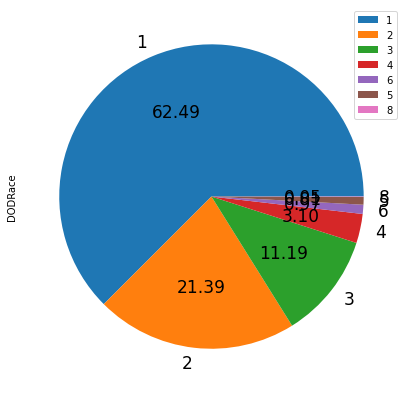

In [20]:
#plot category distribution
cat = y.value_counts()
plt.figure(figsize=(7,7))
cat.plot(kind='pie',fontsize=17, autopct='%.2f')
plt.legend(loc="best")
plt.show()

In [21]:
#data encoding
le = preprocessing.LabelEncoder()
data["Gender"]= le.fit_transform(data["Gender"])
data["Installation"]= le.fit_transform(data["Installation"])
data["Component"]= le.fit_transform(data["Component"])
data["Branch"]= le.fit_transform(data["Branch"])
data["PrimaryMOS"]= le.fit_transform(data["PrimaryMOS"])
data["SubjectsBirthLocation"]= le.fit_transform(data["SubjectsBirthLocation"])
data["WritingPreference"]= le.fit_transform(data["WritingPreference"])

In [22]:
#date time conversion
def convertDatetime(dateTime):
    time_obj = pd.Timestamp(dateTime)
    time_float = time_obj.timestamp()
    return int(time_float)
#end datetime conversion

data['Date'] = data['Date'].apply(convertDatetime)

In [23]:
#normlize the data between [0 - 1]
scaler = preprocessing.MinMaxScaler()
d = scaler.fit_transform(data)
scaled_df = pd.DataFrame(d, columns= data.columns)
scaled_df.head()

,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Age,Heightin,Weightlbs,WritingPreference
0,0.000000,0.375000,0.619718,0.611111,0.481752,0.600000,0.558333,0.542553,0.572816,0.558394,...,0.545455,1.0,0.0,0.235915,0.668874,0.000000,0.585366,0.394737,0.560748,1.0
1,0.000005,0.263514,0.492958,0.534722,0.467153,0.495146,0.491667,0.446809,0.538835,0.445255,...,0.545455,1.0,1.0,0.693662,0.635762,0.000000,0.439024,0.315789,0.498442,0.5
2,0.000007,0.445946,0.554577,0.638889,0.540146,0.561165,0.583333,0.478723,0.699029,0.700730,...,0.545455,1.0,1.0,0.693662,0.635762,0.000024,0.609756,0.315789,0.638629,0.5
3,0.000071,0.266892,0.408451,0.423611,0.540146,0.390291,0.633333,0.510638,0.572816,0.521898,...,0.545455,1.0,0.5,0.778169,0.986755,0.000000,0.341463,0.263158,0.545171,1.0
4,0.000073,0.320946,0.827465,0.854167,0.664234,0.854369,0.675000,0.776596,0.737864,0.510949,...,0.545455,1.0,0.5,0.915493,0.662252,0.000024,0.097561,0.552632,0.663551,1.0


In [24]:
scaled_df.info()
scaled_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6068 entries, 0 to 6067
Columns: 106 entries, subjectid to WritingPreference
dtypes: float64(106)
memory usage: 4.9 MB


,subjectid,abdominalextensiondepthsitting,acromialheight,acromionradialelength,anklecircumference,axillaheight,balloffootcircumference,balloffootlength,biacromialbreadth,bicepscircumferenceflexed,...,Installation,Component,Branch,PrimaryMOS,SubjectsBirthLocation,SubjectNumericRace,Age,Heightin,Weightlbs,WritingPreference
count,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,...,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000,6068.000000
mean,0.011790,0.309016,0.512608,0.544267,0.502857,0.507978,0.484939,0.465475,0.564098,0.455964,...,0.385315,0.535597,0.477752,0.483311,0.533433,0.000390,0.311249,0.322559,0.544391,0.935728
std,0.014460,0.126352,0.139245,0.143889,0.117167,0.139849,0.140375,0.143791,0.146781,0.151532,...,0.290088,0.489600,0.344611,0.323689,0.261628,0.013009,0.211577,0.101630,0.104959,0.181987
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.005290,0.216216,0.413732,0.444444,0.423358,0.409709,0.383333,0.361702,0.451456,0.346715,...,0.090909,0.000000,0.000000,0.235915,0.350993,0.000000,0.146341,0.263158,0.467290,1.000000
50%,0.011028,0.293919,0.519366,0.548611,0.503650,0.512621,0.491667,0.468085,0.587379,0.456204,...,0.363636,1.000000,0.500000,0.461268,0.556291,0.000000,0.268293,0.315789,0.538941,1.000000
75%,0.018908,0.391892,0.610915,0.640625,0.576642,0.603883,0.583333,0.563830,0.669903,0.562044,...,0.636364,1.000000,0.500000,0.792254,0.695364,0.000024,0.463415,0.394737,0.610592,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [25]:
y = y.map(
    {
        1: "White",
        2: "Black",
        3: "Hispanic",
        4: "Asian",
        5: "Native American",
        6: "Pacific Islander",
        8: "Other",
    }
)

In [26]:
#label encoding
le = preprocessing.LabelEncoder()
y= le.fit_transform(y)

In [27]:
# feature selection data
test = SelectKBest(score_func=chi2, k=50)
fit = test.fit(scaled_df, y)
cols_idxs = fit.get_support(indices=True)
x = scaled_df.iloc[:,cols_idxs]
print(x.shape)

(6068, 50)


In [28]:
#split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [29]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

RF = RandomForestClassifier(oob_score=True)
xgbc = XGBClassifier()
knn = KNeighborsClassifier(n_neighbors=1)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [30]:
RF.fit(X_train,y_train)
xgbc.fit(X_train,y_train)
knn.fit(X_train,y_train)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[17:08:25] WARNING: /Users/runner/miniforge3/conda-bld/xgboost-split_1645117948562/work/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


KNeighborsClassifier(n_neighbors=1)

In [31]:
RF_pred = RF.predict(X_test)
xgbc_pred = xgbc.predict(X_test)
knn_pred = knn.predict(X_test)

/opt/anaconda3/lib/python3.9/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [32]:
acc_RF  = metrics.accuracy_score(RF_pred,y_test)* 100
acc_xgbc  = metrics.accuracy_score(xgbc_pred,y_test)* 100
acc_knn  = metrics.accuracy_score(knn_pred,y_test)* 100

rec_RF  = metrics.recall_score(RF_pred,y_test,average='macro')* 100
rec_xgbc  = metrics.recall_score(xgbc_pred,y_test,average='macro')* 100
rec_knn  = metrics.recall_score(knn_pred,y_test,average='macro')* 100


f1_RF  = metrics.f1_score(RF_pred,y_test,average='macro')* 100
f1_xgbc  = metrics.f1_score(xgbc_pred,y_test,average='macro')* 100
f1_knn  = metrics.f1_score(knn_pred,y_test,average='macro')* 100



print("Accuracy of the model by using the Random Forest algorithm : {0:.2f}%".format(acc_RF))
print("Accuracy of the model by using the XGBOOST algorithm : {0:.2f}%".format(acc_xgbc))
print("Accuracy of the model by using the KNN algorithm : {0:.2f}%".format(acc_knn))

print("Recall of the model by using the Random Forest algorithm : {0:.2f}%".format(rec_RF))
print("Recall of the model by using the XGBOOST algorithm : {0:.2f}%".format(rec_xgbc))
print("Recall of the model by using the KNN algorithm : {0:.2f}%".format(rec_knn))

print("F1 of the model by using the Random Forest algorithm : {0:.2f}%".format(f1_RF))
print("F1 of the model by using the XGBOOST algorithm : {0:.2f}%".format(f1_xgbc))
print("F1 of the model by using the KNN algorithm : {0:.2f}%".format(f1_knn))

Accuracy of the model by using the Random Forest algorithm : 77.51%
Accuracy of the model by using the XGBOOST algorithm : 80.07%
Accuracy of the model by using the KNN algorithm : 66.39%
Recall of the model by using the Random Forest algorithm : 33.12%
Recall of the model by using the XGBOOST algorithm : 40.02%
Recall of the model by using the KNN algorithm : 25.80%
F1 of the model by using the Random Forest algorithm : 29.35%
F1 of the model by using the XGBOOST algorithm : 34.73%
F1 of the model by using the KNN algorithm : 25.37%


/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


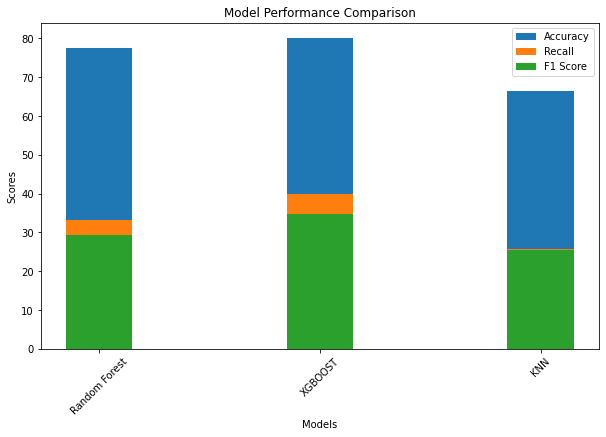

In [33]:
# Accuracy scores
accuracy_scores = [acc_RF, acc_xgbc, acc_knn]

# Recall scores
recall_scores = [rec_RF, rec_xgbc, rec_knn]

# F1 scores
f1_scores = [f1_RF, f1_xgbc, f1_knn]

# Model names
models = ['Random Forest', 'XGBOOST', 'KNN']

# Creating the bar plot
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, width=0.3, label='Accuracy')
plt.bar(models, recall_scores, width=0.3, label='Recall')
plt.bar(models, f1_scores, width=0.3, label='F1 Score')

# Adding labels and titles
plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.legend()

# Displaying the plot
plt.show()

Considering the imbalanced nature of the classes, XGBoost performs relatively better than the other models.
It has the highest accuracy, recall, and F1 score among the three models.

Based on the given performance metrics, XGBoost seems to be the most suitable model for predicting the race of soldiers when dealing with imbalanced classes.